In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from scipy.stats import t

# Student t Random Variable 

## Introduction

If $Z\sim\mathcal{N}(0, 1)$ and $X\sim\chi^2(t)$ are independent, then the random variable:

$$T = \frac{Z}{\sqrt{X/k}}$$

follows a $t$-distribution with $k$ degrees of freedom. 

## Distribution

The probability density function (pdf) of the t-distribution is
$$f(x, k) = \frac{\Gamma\big(\frac{k+1}{2}\big)}{\sqrt{\pi k}\Gamma\big(\frac{k}{2}\big)}\cdot\frac{1}{\big(1 + 
\frac{x^2}{k}\big)^{\frac{k+1}{2}}}$$

In [2]:
# Define degrees of freedom
df = 10 # For a sample size of n (n-1)

In [5]:
# Calculate PDF at a specific value
x_val = 1.5
pdf_value = t.pdf(x_val, df)
print(f"PDF at x={x_val}: {pdf_value}")

PDF at x=1.5: 0.1274447942870917


In [6]:
# Calculate CDF at a specific value
cdf_value = t.cdf(x_val, df)
print(f"CDF at x={x_val}: {cdf_value}")

CDF at x=1.5: 0.9177463367772799


In [7]:
quantile = 0.95
ppf_value = t.ppf(quantile, df)
print(f"PPF at {quantile}: {ppf_value:.4f}")

PPF at 0.95: 1.8125


In [8]:
# Calculate a 95% confidence interval
confidence_interval = t.interval(0.95, df)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (np.float64(-2.2281388519649385), np.float64(2.2281388519649385))


## Visualization

### Histogram

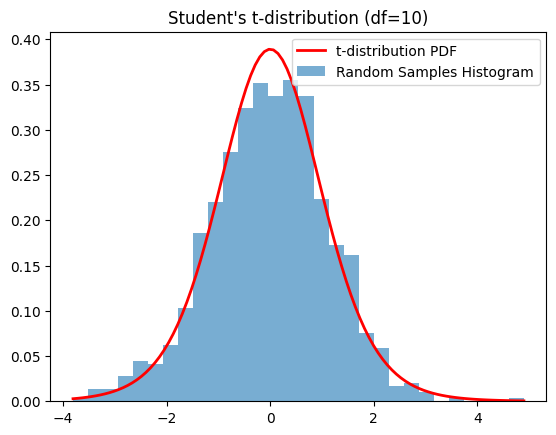

In [15]:
samples = t.rvs(df=df, size=1000)
x = np.linspace(min(samples), max(samples), 100)
# Plot the histogram of the samples
plt.plot(x, t.pdf(x, df), 'r-', lw=2, label='t-distribution PDF')
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Random Samples Histogram')
# sns.hist(samples, bins=30, alpha=0.6, color='g', label='Random Samples', kde=True)
plt.title(f'Student\'s t-distribution (df={df})')
plt.legend()
plt.show()

### Degree of Freedom

In [25]:
tvalues = np.linspace(-4, 4, 1000)
data = pd.DataFrame({'t': tvalues})
for degreeFreedom in np.arange(3, 71):
    data[degreeFreedom]=t.pdf(tvalues, df=degreeFreedom)

t_df = pd.melt(data, id_vars=['t'], value_vars=list(np.arange(3, 71)), var_name="degree_of_freedom", value_name="pdf")

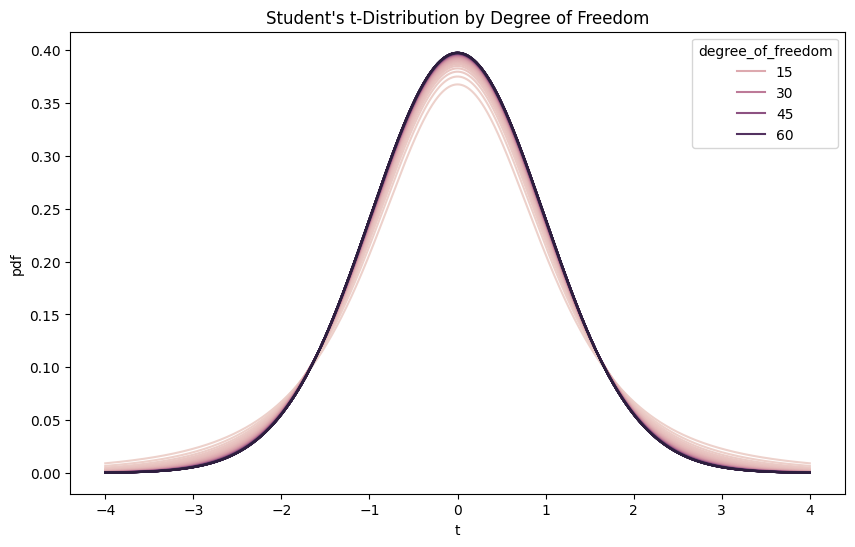

In [27]:
# Plotting 'pdf' over 'x' for each 'degree_of_freedom'
plt.figure(figsize=(10, 6))
sns.lineplot(data=t_df, x="t", y="pdf", hue="degree_of_freedom")

plt.title("Student's t-Distribution by Degree of Freedom")
plt.show()

### Significance Level

In [49]:
p_values = np.arange(0.001, 0.1, 0.001)
data = pd.DataFrame({'p': p_values})
for degreeFreedom in np.arange(3, 71):
    data[degreeFreedom]=t.ppf(1-p_values/2, df=degreeFreedom)
    
t_df = pd.melt(data, id_vars=['p'], value_vars=list(np.arange(3, 71)), var_name="degree_of_freedom", value_name="t")

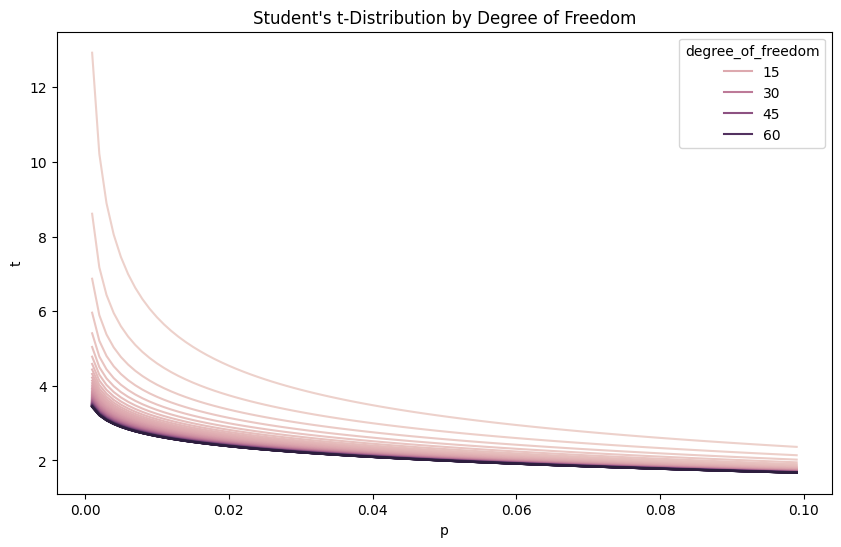

In [50]:
# Plotting 'pdf' over 'x' for each 'degree_of_freedom'
plt.figure(figsize=(10, 6))
sns.lineplot(data=t_df, x="p", y="t", hue="degree_of_freedom")

plt.title("Student's t-Distribution by Degree of Freedom")
plt.show()

In [51]:
t.ppf(1-0.05/2, df=3)

np.float64(3.182446305284263)

## References

* [26.4 - Student's t Distribution](https://online.stat.psu.edu/stat414/lesson/26/26.4)